In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc



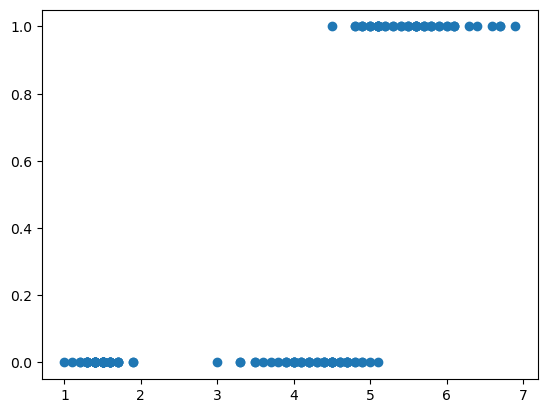

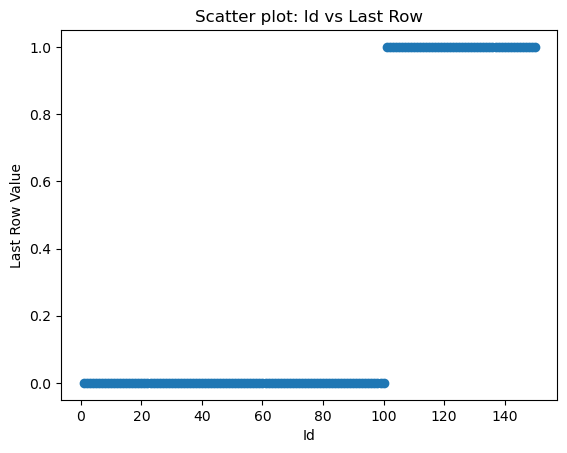

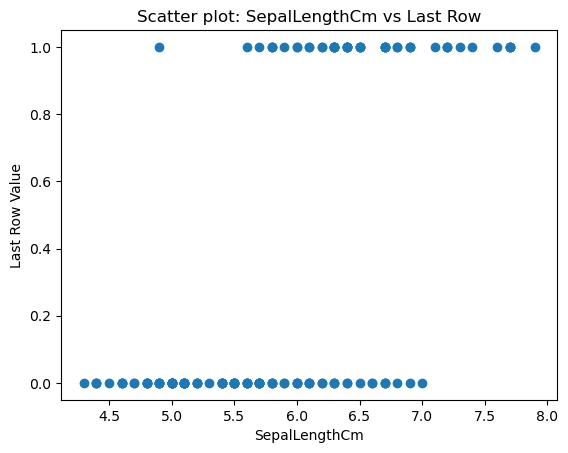

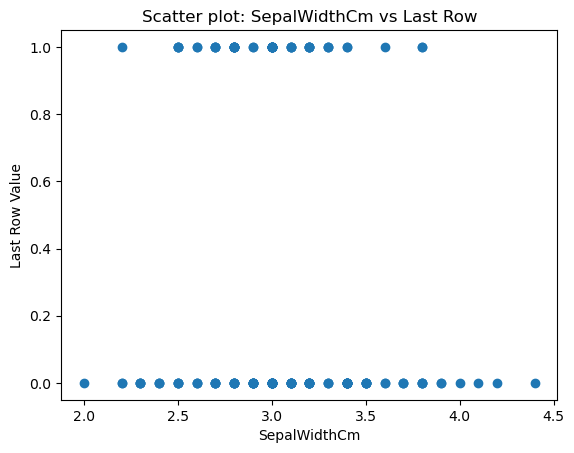

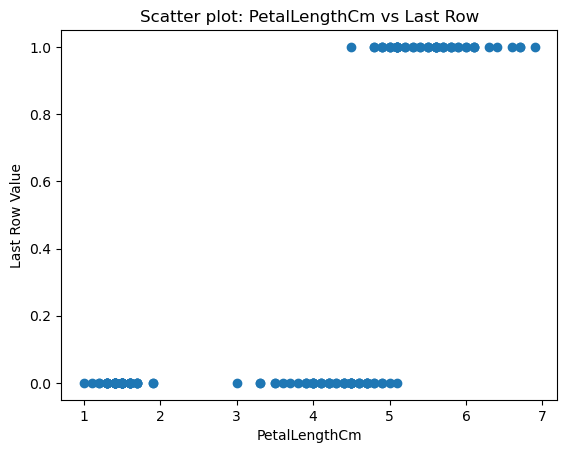

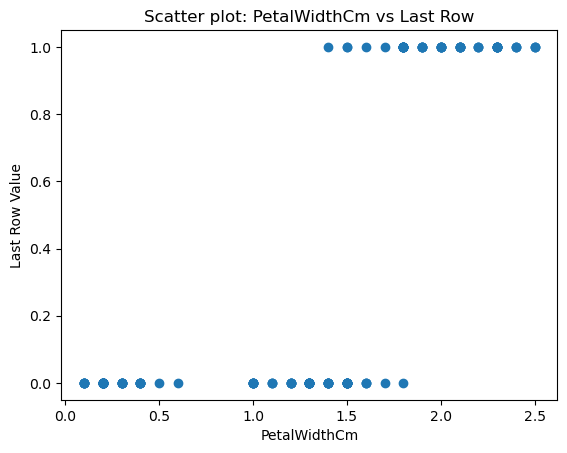

In [2]:
df=pd.read_csv("Downloads/Iris.csv")
df["Species"]=df["Species"].apply(lambda x: 1 if x=="Iris-virginica" else 0)
plt.scatter(df["PetalLengthCm"],df["Species"])
y_values = df.iloc[-1]
# print("Missing values in each column:")
# print(df.isnull().sum())
for column in df.columns:
    if column != 'Species':  # Assuming 'species' is a non-numeric column
        plt.figure()  # Create a new figure for each plot
        plt.scatter(df[column], df["Species"])
        plt.title(f'Scatter plot: {column} vs Last Row')
        plt.xlabel(column)
        plt.ylabel('Last Row Value')
        plt.show()


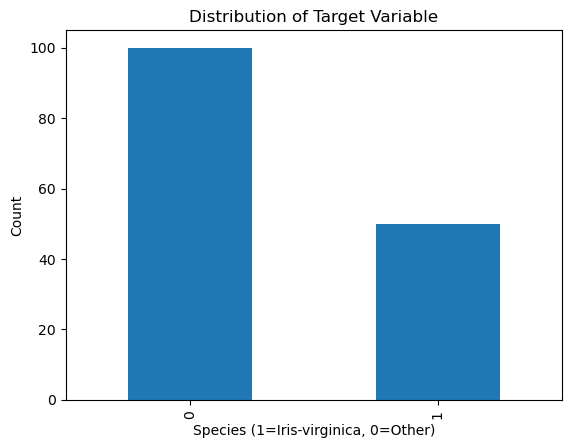

In [3]:
plt.figure()
df["Species"].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Species (1=Iris-virginica, 0=Other)')
plt.ylabel('Count')
plt.show()

In [4]:
data=df.values

X=data[:,0:4]
Y=data[:,-1].reshape(data.shape[0],1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,shuffle=True,test_size=0.20,random_state=1234)
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])


In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def model(X,Y,lr,iterations):
  n=X.shape[0]
  m=X.shape[1]
  W = np.zeros((n,1))
  B=0
  cost_list=[]
  for i in range(iterations):
    z=np.dot(W.T,X) + B
    A = sigmoid(z)
    cost=-(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw=(1/m)*np.dot(A-Y,X.T)
    db=(1/m)*np.sum(A-Y)
    W= W-lr*dw.T
    B = B- lr*db

    cost_list.append(cost)
    # print("heello")
    if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
     
  return W, B, cost_list

iterations = 100000
lr= 0.001
w,b,cost_list= model(X_train,Y_train,lr=lr,iterations=iterations)


cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.1643062950164741
cost after  20000 iteration is :  0.14127709984128894
cost after  30000 iteration is :  0.12548251317047196
cost after  40000 iteration is :  0.113156401484366
cost after  50000 iteration is :  0.1032157596720465
cost after  60000 iteration is :  0.09505322332766705
cost after  70000 iteration is :  0.08825407614417585
cost after  80000 iteration is :  0.08251840625254728
cost after  90000 iteration is :  0.0776241107843472


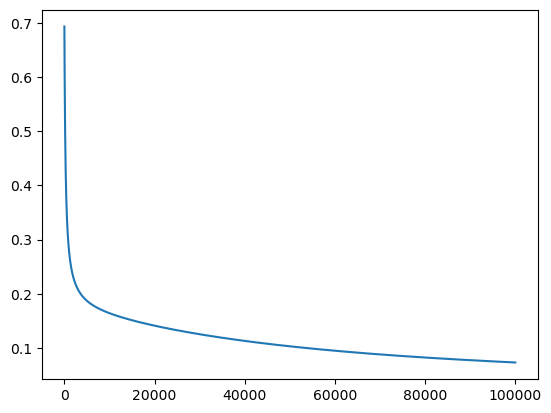

In [6]:
plt.plot(np.arange(iterations), cost_list)
plt.show()


In [7]:
def performance_metrics(X, Y, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    A = A > 0.5
    A = np.array(A, dtype='int64')
    
    TP = np.sum((A == 1) & (Y == 1))
    TN = np.sum((A == 0) & (Y == 0))
    FP = np.sum((A == 1) & (Y == 0))
    FN = np.sum((A == 0) & (Y == 1))
    
    accuracy = (TP + TN) / Y.shape[1]
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print("Accuracy:", accuracy * 100, "%")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)

# Calculate performance metrics on test data
performance_metrics(X_test, Y_test, w, b)



Accuracy: 93.33333333333333 %
Precision: 1.0
Recall: 0.75
F1-Score: 0.8571428571428571


In [8]:
Z = np.dot(w.T, X_test) + b
A = sigmoid(Z)
fpr,tpr,thresholds=roc_curve(Y_test.T,A.T)
roc_auc = auc(fpr, tpr)


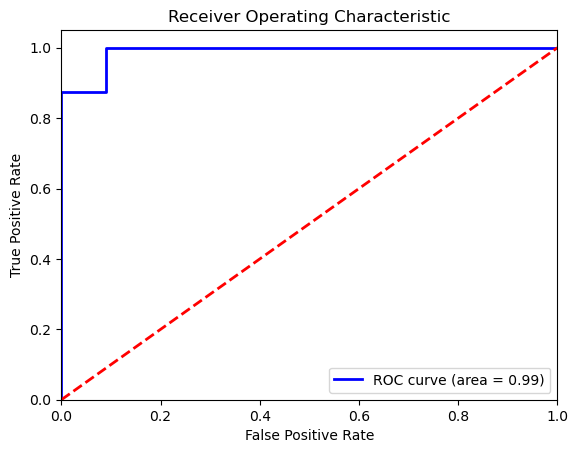

In [9]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()